In [27]:
!pip install kagglehub --upgrade


   ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
   ------------------ --------------------- 30.7/68.0 kB ? eta -:--:--
   ---------------------------------------- 68.0/68.0 kB 916.8 kB/s eta 0:00:00


In [2]:
!pip install spotipy pandas matplotlib seaborn plotly


In [1]:
# Imports
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time


In [3]:
# Replace with your actual credentials
client_id = "44ff9a105fa9440fb1262e78085c1bc3"
client_secret = "3a5d85a572c24690a2ae7adb2cec53a7"

# Set up credentials manager
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)


In [5]:


# Function to fetch tracks from a playlist
def get_playlist_tracks(playlist_id):
    results = sp.playlist_items(playlist_id, limit=50)
    tracks = results['items']

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    return tracks

# Use your extracted playlist ID
playlist_id = '56I2PLAl5B86KBQUzWrPwT'
tracks_data = get_playlist_tracks(playlist_id)

# Quick peek at data
for i, item in enumerate(tracks_data[::]):
    track = item['track']
    print(f"{i+1}. {track['name']} by {track['artists'][0]['name']}")



1. Eraser by Ed Sheeran
2. Maate Vinadhuga by Sid Sriram
3. Emai Poyave by Sid Sriram
4. Kasturi (From "Amar Prem Ki Prem Kahani") by Arijit Singh
5. Zaalima by Arijit Singh
6. Abhi Mujh Mein Kahin by Ajay-Atul
7. Abhi Mujh Mein Kahin by Ajay-Atul
8. Lag Ja Gale Se Phir by Lata Mangeshkar
9. Annul Maelae by Harris Jayaraj
10. Unakkul Naane by Harris Jayaraj


In [7]:
def extract_playlist_id(url):
    return url.split("/")[-1].split("?")[0]


In [9]:
extract_playlist_id("https://open.spotify.com/album/7vS2BrXKn2x5dzigdXCpea?si=BM7sbdugR4yZ7mZm179w7Q")

'7vS2BrXKn2x5dzigdXCpea'

In [11]:
import pandas as pd

def parse_tracks(tracks_data):
    track_list = []

    for item in tracks_data:
        track = item.get('track')
        if track:
            track_info = {
                'track_name': track.get('name', 'N/A'),
                'artist_name': track.get('artists', [{'name': 'N/A'}])[0].get('name', 'N/A'),
                'album': track.get('album', {}).get('name', 'N/A'),
                'release_date': track.get('album', {}).get('release_date', 'N/A'),
                'duration_ms': track.get('duration_ms', 0),
                'popularity': track.get('popularity', 0),
                'spotify_url': track.get('external_urls', {}).get('spotify', 'N/A'),
                'track_id': track.get('id', 'N/A')
            }
            track_list.append(track_info)

    return pd.DataFrame(track_list)


In [15]:
df_tracks = parse_tracks(tracks_data)
df_tracks['duration_min'] = df_tracks['duration_ms'] / 60000
df_tracks.head(10)


track_name      artist_name  \
0                                     Eraser       Ed Sheeran   
1                            Maate Vinadhuga       Sid Sriram   
2                                Emai Poyave       Sid Sriram   
3  Kasturi (From "Amar Prem Ki Prem Kahani")     Arijit Singh   
4                                    Zaalima     Arijit Singh   
5                       Abhi Mujh Mein Kahin        Ajay-Atul   
6                       Abhi Mujh Mein Kahin        Ajay-Atul   
7                        Lag Ja Gale Se Phir  Lata Mangeshkar   
8                               Annul Maelae   Harris Jayaraj   
9                              Unakkul Naane   Harris Jayaraj   

                                               album release_date  \
0                                         ÷ (Deluxe)   2017-03-03   
1                                          Taxiwaala   2018-10-26   
2                             Padi Padi Leche Manasu   2018-12-10   
3          Kasturi (From "Amar Prem Ki Prem Kahani")   2024-09-17   
4         Raees (Original Motion Picture Soundtrack)   2017-01-24   
5     Agneepath (Original Motion Picture Soundtrack)   2011-12-16   
6     Agneepath (Original Motion Picture Soundtrack)   2011-12-16   
7                                       Woh Kaun Thi   1964-01-01   
8  Vaaranam Aayiram (Original Motion Picture Soun...   2008-10-08   
9                                      Unakkul Naane   2023-05-03   

   duration_ms  popularity                                        spotify_url  \
0       227426          60  https://open.spotify.com/track/7oolFzHipTMg2nL...   
1       296220          65  https://open.spotify.com/track/15tihU7QrnhaBvE...   
2       154691           0  https://open.spotify.com/track/14M1StehpwsydSG...   
3       232568          75  https://open.spotify.com/track/2E5kZ1qnB7V9bcw...   
4       299333          74  https://open.spotify.com/track/1J9vyEntJ79Cppv...   
5       364786          66  https://open.spotify.com/track/73y649QhnXdcm6f...   
6       364786          66  https://open.spotify.com/track/73y649QhnXdcm6f...   
7       257613          63  https://open.spotify.com/track/5Y5c5bJK0O7KJDD...   
8       322506          68  https://open.spotify.com/track/2WO5nzB7QtKn9ZR...   
9       127850          60  https://open.spotify.com/track/4Bsf8Pzli5MQv9z...   

                 track_id  duration_min  
0  7oolFzHipTMg2nL7shhdz2      3.790433  
1  15tihU7QrnhaBvE7hXGDwa      4.937000  
2  14M1StehpwsydSGGy8z9eq      2.578183  
3  2E5kZ1qnB7V9bcwBEKvZv8      3.876133  
4  1J9vyEntJ79CppvgUxJs75      4.988883  
5  73y649QhnXdcm6fRdvfraO      6.079767  
6  73y649QhnXdcm6fRdvfraO      6.079767  
7  5Y5c5bJK0O7KJDDAYKkppH      4.293550  
8  2WO5nzB7QtKn9ZRc9Jkalt      5.375100  
9  4Bsf8Pzli5MQv9zLF9KXqc      2.130833

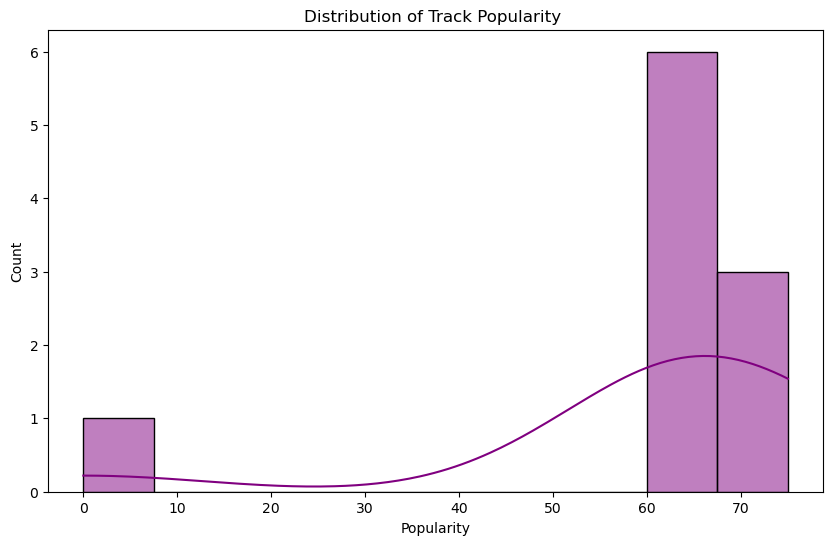

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_tracks['popularity'], bins=10, kde=True, color='purple')
plt.title("Distribution of Track Popularity ")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\1492899636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='track_name', y='popularity', palette='viridis')


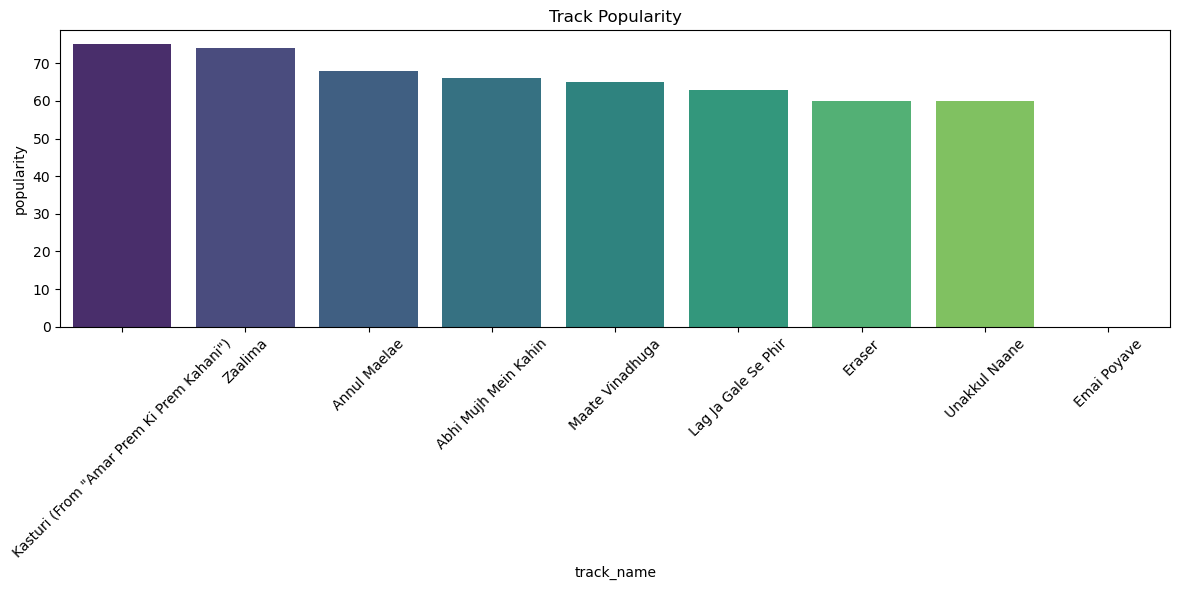

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sorting by popularity for better visuals
df_sorted = df_tracks.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=df_sorted, x='track_name', y='popularity', palette='viridis')
plt.xticks(rotation=45)
plt.title('Track Popularity')
plt.tight_layout()
plt.show()


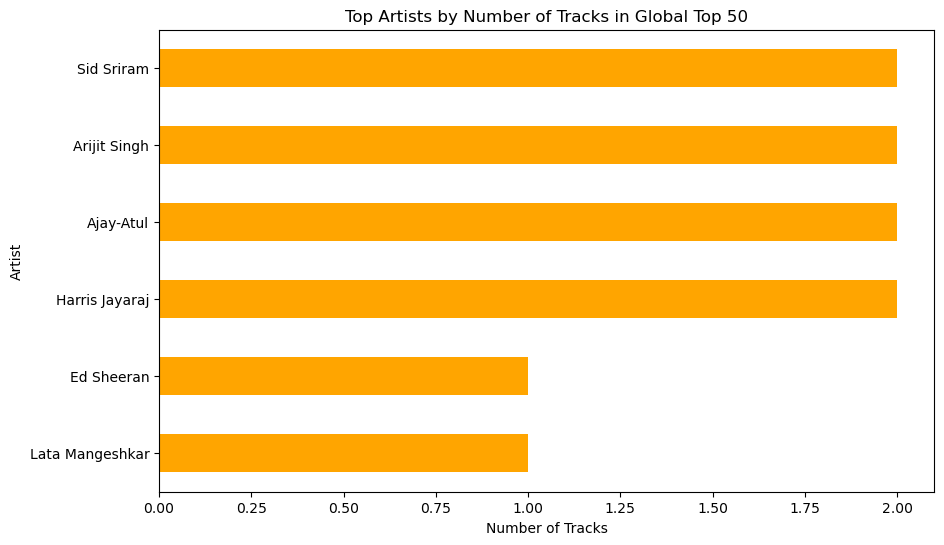

In [21]:
top_artists = df_tracks['artist_name'].value_counts().head(15)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='barh', color='orange')
plt.gca().invert_yaxis()
plt.title("Top Artists by Number of Tracks in Global Top 50")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()


In [23]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.cache_handler import MemoryCacheHandler



sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id="44ff9a105fa9440fb1262e78085c1bc3",
    client_secret="3a5d85a572c24690a2ae7adb2cec53a7",
    redirect_uri="http://127.0.0.1:8888/callback",  # Keep 8888 (won't be used if token exists)
     scope="user-library-read playlist-read-private",
    cache_handler=MemoryCacheHandler()  # Stores token in memory
))


In [25]:
# Check the structure of your DataFrame
df_tracks.info()

# Peek at the first few rows
df_tracks.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    10 non-null     object 
 1   artist_name   10 non-null     object 
 2   album         10 non-null     object 
 3   release_date  10 non-null     object 
 4   duration_ms   10 non-null     int64  
 5   popularity    10 non-null     int64  
 6   spotify_url   10 non-null     object 
 7   track_id      10 non-null     object 
 8   duration_min  10 non-null     float64
dtypes: float64(1), int64(2), object(6)
memory usage: 852.0+ bytes


track_name   artist_name  \
0                                     Eraser    Ed Sheeran   
1                            Maate Vinadhuga    Sid Sriram   
2                                Emai Poyave    Sid Sriram   
3  Kasturi (From "Amar Prem Ki Prem Kahani")  Arijit Singh   
4                                    Zaalima  Arijit Singh   

                                        album release_date  duration_ms  \
0                                  ÷ (Deluxe)   2017-03-03       227426   
1                                   Taxiwaala   2018-10-26       296220   
2                      Padi Padi Leche Manasu   2018-12-10       154691   
3   Kasturi (From "Amar Prem Ki Prem Kahani")   2024-09-17       232568   
4  Raees (Original Motion Picture Soundtrack)   2017-01-24       299333   

   popularity                                        spotify_url  \
0          60  https://open.spotify.com/track/7oolFzHipTMg2nL...   
1          65  https://open.spotify.com/track/15tihU7QrnhaBvE...   
2           0  https://open.spotify.com/track/14M1StehpwsydSG...   
3          75  https://open.spotify.com/track/2E5kZ1qnB7V9bcw...   
4          74  https://open.spotify.com/track/1J9vyEntJ79Cppv...   

                 track_id  duration_min  
0  7oolFzHipTMg2nL7shhdz2      3.790433  
1  15tihU7QrnhaBvE7hXGDwa      4.937000  
2  14M1StehpwsydSGGy8z9eq      2.578183  
3  2E5kZ1qnB7V9bcwBEKvZv8      3.876133  
4  1J9vyEntJ79CppvgUxJs75      4.988883

## Phase 1: data loading

In [27]:
import pandas as pd

# Load CSV files
tracks_df = pd.read_csv("spotify_dataset/tracks.csv")
artists_df = pd.read_csv("spotify_dataset/artists.csv")

# Quick preview
print("Tracks Shape:", tracks_df.shape)
print("Artists Shape:", artists_df.shape)
tracks_df.head()


Tracks Shape: (586672, 20)
Artists Shape: (1162095, 5)


id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

🎵 Tracks: (586672, 20)
🧑‍🎤 Artists: (1162095, 5)


id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                                     ปูนา ภาวิณี           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0

⚠️ Merge skipped: 'artist_id' or 'id' column not found.

🔍 Null values in combined_df:
id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

📊 Data types before cleaning:
id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness     

id        name     popularity   duration_ms  \
count                   586672      586601  586672.000000  5.866720e+05   
unique                  586672      446474            NaN           NaN   
top     35iwgR4jXetI318WEWsa1Q  Summertime            NaN           NaN   
freq                         1         101            NaN           NaN   
mean                       NaN         NaN      27.570053  2.300512e+05   
min                        NaN         NaN       0.000000  3.344000e+03   
25%                        NaN         NaN      13.000000  1.750930e+05   
50%                        NaN         NaN      27.000000  2.148930e+05   
75%                        NaN         NaN      41.000000  2.638670e+05   
max                        NaN         NaN     100.000000  5.621218e+06   
std                        NaN         NaN      18.370642  1.265261e+05   

             explicit           artists                  id_artists  \
count   586672.000000            586672                      586672   
unique            NaN            114030                      115062   
top               NaN  ['Die drei ???']  ['3meJIgRw7YleJrmbpbJK6S']   
freq              NaN              3856                        3856   
mean         0.044086               NaN                         NaN   
min          0.000000               NaN                         NaN   
25%          0.000000               NaN                         NaN   
50%          0.000000               NaN                         NaN   
75%          0.000000               NaN                         NaN   
max          1.000000               NaN                         NaN   
std          0.205286               NaN                         NaN   

                         release_date   danceability         energy  \
count                          448081  586672.000000  586672.000000   
unique                            NaN            NaN            NaN   
top                               NaN            NaN            NaN   
freq                              NaN            NaN            NaN   
mean    1993-03-20 11:18:05.115414400       0.563594       0.542036   
min               1900-01-01 00:00:00       0.000000       0.000000   
25%               1980-01-01 00:00:00       0.453000       0.343000   
50%               1997-01-01 00:00:00       0.577000       0.549000   
75%               2011-01-01 00:00:00       0.686000       0.748000   
max               2021-04-16 00:00:00       0.991000       1.000000   
std                               NaN       0.166103       0.251923   

                  key       loudness           mode    speechiness  \
count   586672.000000  586672.000000  586672.000000  586672.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         5.221603     -10.206067       0.658797       0.104864   
min          0.000000     -60.000000       0.000000       0.000000   
25%          2.000000     -12.891000       0.000000       0.034000   
50%          5.000000      -9.243000       1.000000       0.044300   
75%          8.000000      -6.482000       1.000000       0.076300   
max         11.000000       5.376000       1.000000       0.971000   
std          3.519423       5.089328       0.474114       0.179893   

         acousticness  instrumentalness       liveness        valence  \
count   586672.000000     586672.000000  586672.000000  586672.000000   
unique            NaN               NaN            NaN            NaN   
top               NaN               NaN            NaN            NaN   
freq              NaN               NaN            NaN            NaN   
mean         0.449863          0.113451       0.213935       0.552292   
min          0.000000          0.000000       0.000000       0.000000   
25%          0.096900          0.000000       0.098300       0.346000

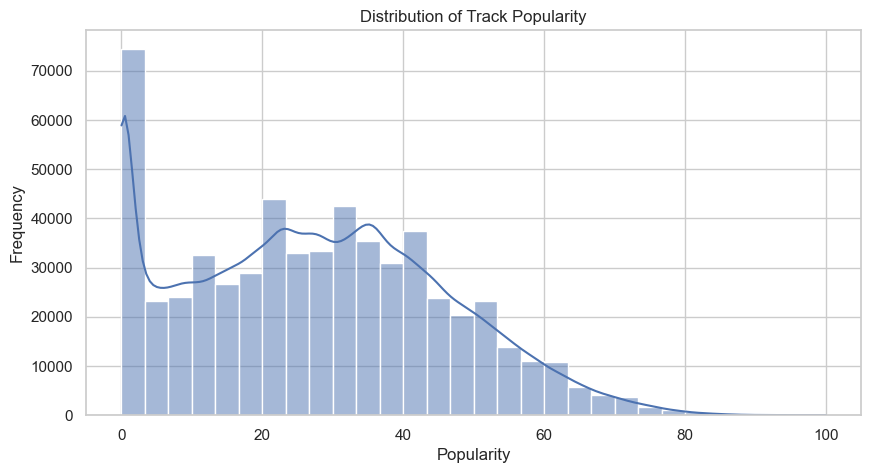


⏱️ Track Duration Range:
Min: 3344
Max: 5621218


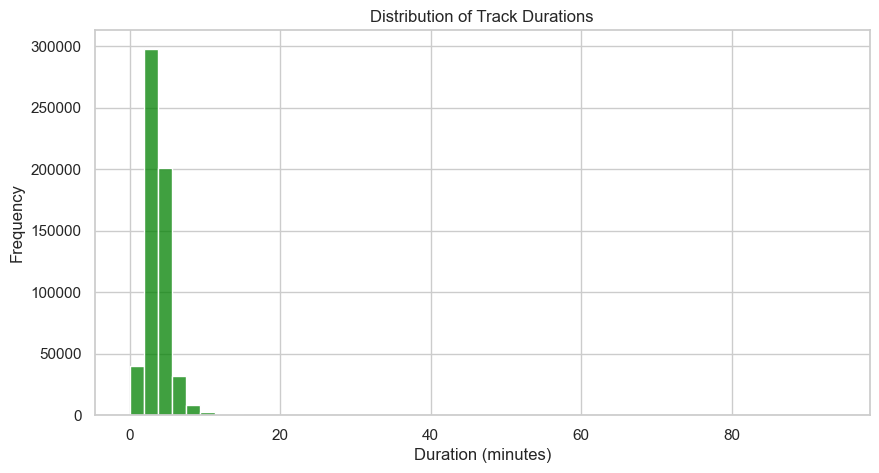

In [29]:
# Phase 1: Setup + Initial Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# --- STEP 1: Load the Dataset ---

# Load CSV files
tracks_df = pd.read_csv("spotify_dataset/tracks.csv")
artists_df = pd.read_csv("spotify_dataset/artists.csv")

# Print shapes and preview
print(f"🎵 Tracks: {tracks_df.shape}")
print(f"🧑‍🎤 Artists: {artists_df.shape}")

display(tracks_df.head())
display(artists_df.head())

# --- STEP 2: Merge Artist Info with Tracks (if necessary) ---

# Check if 'artist_id' exists in both to merge
if 'artist_id' in tracks_df.columns and 'id' in artists_df.columns:
    combined_df = tracks_df.merge(artists_df, left_on='artist_id', right_on='id', how='left')
    print(f"✅ Merged DataFrame shape: {combined_df.shape}")
else:
    print("⚠️ Merge skipped: 'artist_id' or 'id' column not found.")
    combined_df = tracks_df.copy()

# --- STEP 3: Basic Cleaning ---

# 1. Null values
print("\n🔍 Null values in combined_df:")
print(combined_df.isnull().sum())

# 2. Check datatypes
print("\n📊 Data types before cleaning:")
print(combined_df.dtypes)

# 3. Convert date-related columns
if 'release_date' in combined_df.columns:
    combined_df['release_date'] = pd.to_datetime(combined_df['release_date'], errors='coerce')

# 4. Remove duplicates
combined_df.drop_duplicates(inplace=True)

# 5. Fill missing values (optional — only if needed)
# combined_df['some_column'].fillna(value, inplace=True)

print("\n✅ Cleaned DataFrame info:")
print(combined_df.info())

# --- STEP 4: Basic Descriptive Stats ---

print("\n🎯 Summary statistics:")
display(combined_df.describe(include='all'))

# Popularity distribution
if 'popularity' in combined_df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(combined_df['popularity'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Track Popularity")
    plt.xlabel("Popularity")
    plt.ylabel("Frequency")
    plt.show()

# Top genres (if available)
if 'genres' in combined_df.columns:
    print("\n🎧 Top Genres:")
    genre_counts = combined_df['genres'].dropna().explode().value_counts().head(10)
    display(genre_counts)

# Duration range
if 'duration_ms' in combined_df.columns:
    print("\n⏱️ Track Duration Range:")
    print("Min:", combined_df['duration_ms'].min())
    print("Max:", combined_df['duration_ms'].max())

    # Convert to minutes for histogram
    combined_df['duration_min'] = combined_df['duration_ms'] / 60000
    plt.figure(figsize=(10, 5))
    sns.histplot(combined_df['duration_min'], bins=50, color='green')
    plt.title("Distribution of Track Durations")
    plt.xlabel("Duration (minutes)")
    plt.ylabel("Frequency")
    plt.show()


## Artist explorer - Phase 2

In [31]:
# 🎧 Artist Explorer - Phase 2

# Function to search for artist name and display info
def explore_artist(artist_name, df):
    artist_tracks = df[df['artists'].str.contains(artist_name, case=False, na=False)]
    
    if artist_tracks.empty:
        print(f"❌ No tracks found for artist: {artist_name}")
        return
    
    print(f"✅ Found {artist_tracks.shape[0]} tracks for artist: {artist_name}")
    display(artist_tracks[['name', 'release_date', 'popularity', 'duration_ms']].sort_values(by='popularity', ascending=False).head(10))

    # Convert duration from ms to mins
    artist_tracks['duration_min'] = artist_tracks['duration_ms'] / 60000

    # Basic Stats
    print("\n📊 Average Stats:")
    display(artist_tracks[['danceability', 'energy', 'valence', 'tempo', 'popularity']].mean().round(2))

    # --- PLOTS ---
    
    # 1. Popularity over Time
    plt.figure(figsize=(12, 5))
    artist_tracks_sorted = artist_tracks.sort_values(by='release_date')
    sns.lineplot(x='release_date', y='popularity', data=artist_tracks_sorted)
    plt.title(f"📈 Popularity Over Time for {artist_name.title()}")
    plt.xticks(rotation=45)
    plt.xlabel("Release Date")
    plt.ylabel("Popularity")
    plt.tight_layout()
    plt.show()

    # 2. Audio Features Radar Chart
    audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness']
    mean_vals = artist_tracks[audio_features].mean().values

    # Radar chart setup
    angles = np.linspace(0, 2 * np.pi, len(audio_features), endpoint=False).tolist()
    mean_vals = np.concatenate((mean_vals, [mean_vals[0]]))  # loop back
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, mean_vals, color='blue', linewidth=2)
    ax.fill(angles, mean_vals, color='skyblue', alpha=0.4)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(audio_features)
    ax.set_title(f"🔊 Audio Profile: {artist_name.title()}", size=14)
    plt.show()


✅ Found 134 tracks for artist: ed sheeran


name release_date  \
92881                                          Afterglow   2020-12-21   
89911                                            Perfect   2017-03-03   
89912                                       Shape of You   2017-03-03   
86990                                         Photograph   2014-06-21   
86993                                  Thinking out Loud   2014-06-21   
91953                  I Don't Care (with Justin Bieber)   2019-05-10   
89940                                            Happier   2017-03-03   
91981                    Beautiful People (feat. Khalid)   2019-06-28   
92049  South of the Border (feat. Camila Cabello & Ca...   2019-07-12   
90004                                        Galway Girl   2017-03-03   

       popularity  duration_ms  
92881          88       185487  
89911          87       263400  
89912          87       233713  
86990          85       258987  
86993          84       281560  
91953          83       219947  
89940          83       207520  
91981          81       197867  
92049          80       204467  
90004          80       170827


📊 Average Stats:


C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2358774255.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



danceability      0.64
energy            0.48
valence           0.46
tempo           106.85
popularity       59.07
dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2358774255.py:31: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.

C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



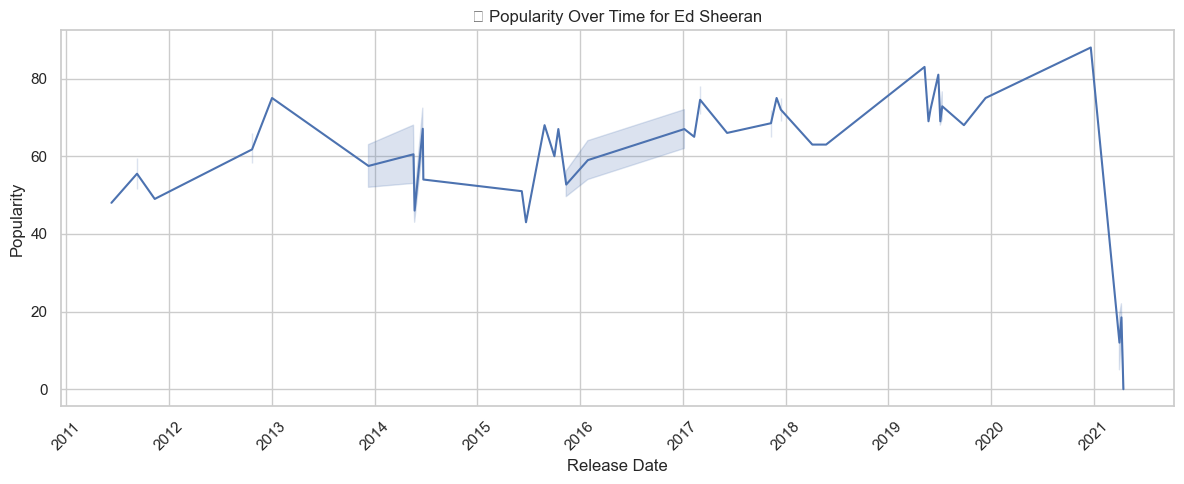

C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128266 (\N{SPEAKER WITH THREE SOUND WAVES}) missing from current font.



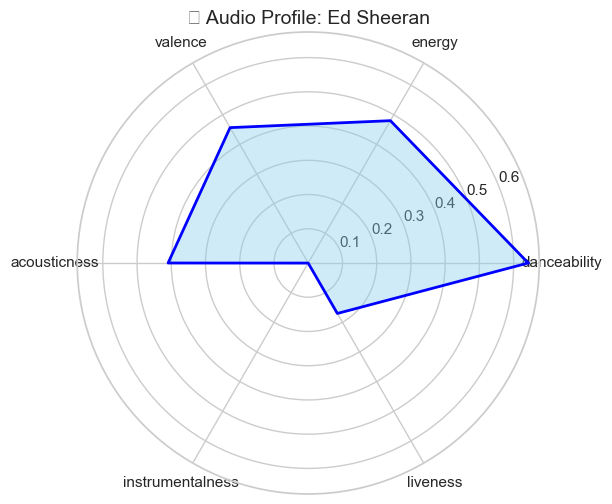

In [201]:
explore_artist("ed sheeran", combined_df)


### finding top tracks

C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\1134149922.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="popularity", y="name", data=top_tracks, palette="viridis")
C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\1134149922.py:21: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


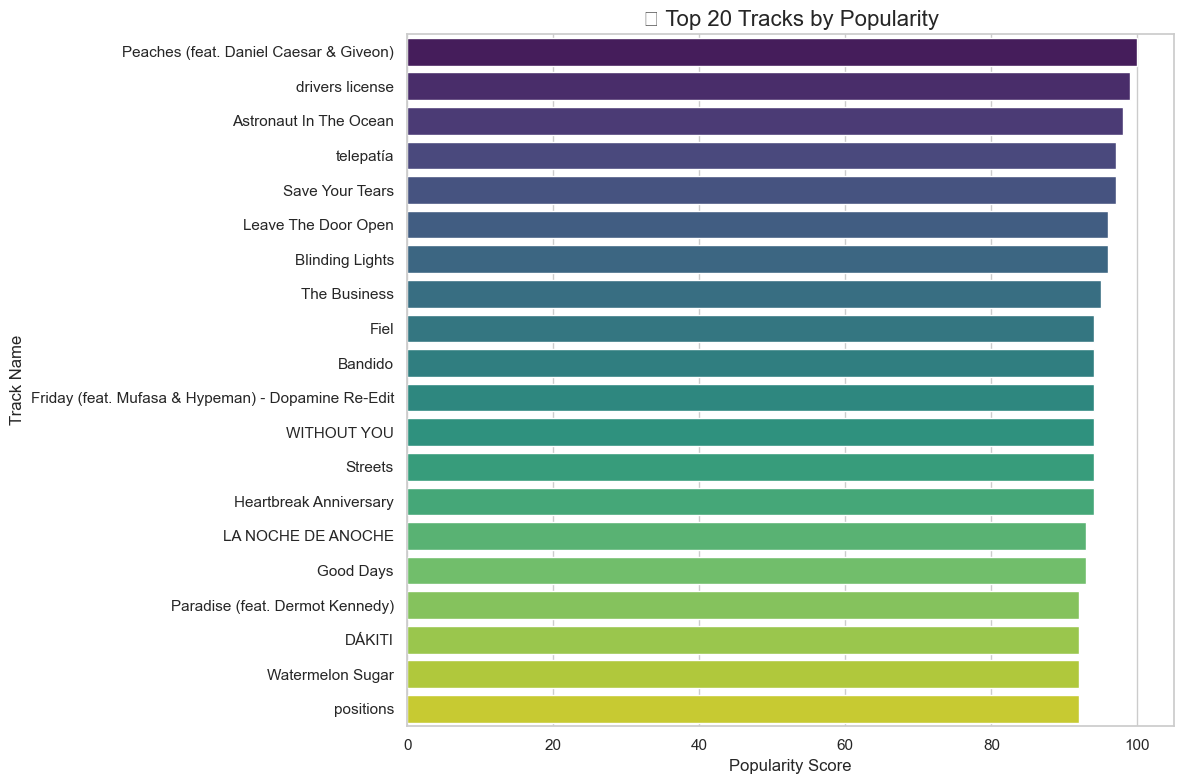

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df_tracks = pd.read_csv("spotify_dataset/tracks.csv")

# Step 2: Clean nulls (if any)
df_tracks.dropna(subset=["name", "popularity"], inplace=True)

# Step 3: Sort by popularity and pick top 20
top_tracks = df_tracks.sort_values("popularity", ascending=False).head(20)

# Step 4: Plot
plt.figure(figsize=(12, 8))
sns.barplot(x="popularity", y="name", data=top_tracks, palette="viridis")

plt.title("🎧 Top 20 Tracks by Popularity", fontsize=16)
plt.xlabel("Popularity Score")
plt.ylabel("Track Name")
plt.tight_layout()
plt.show()


### tracks popularity over time

C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\1942208225.py:21: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


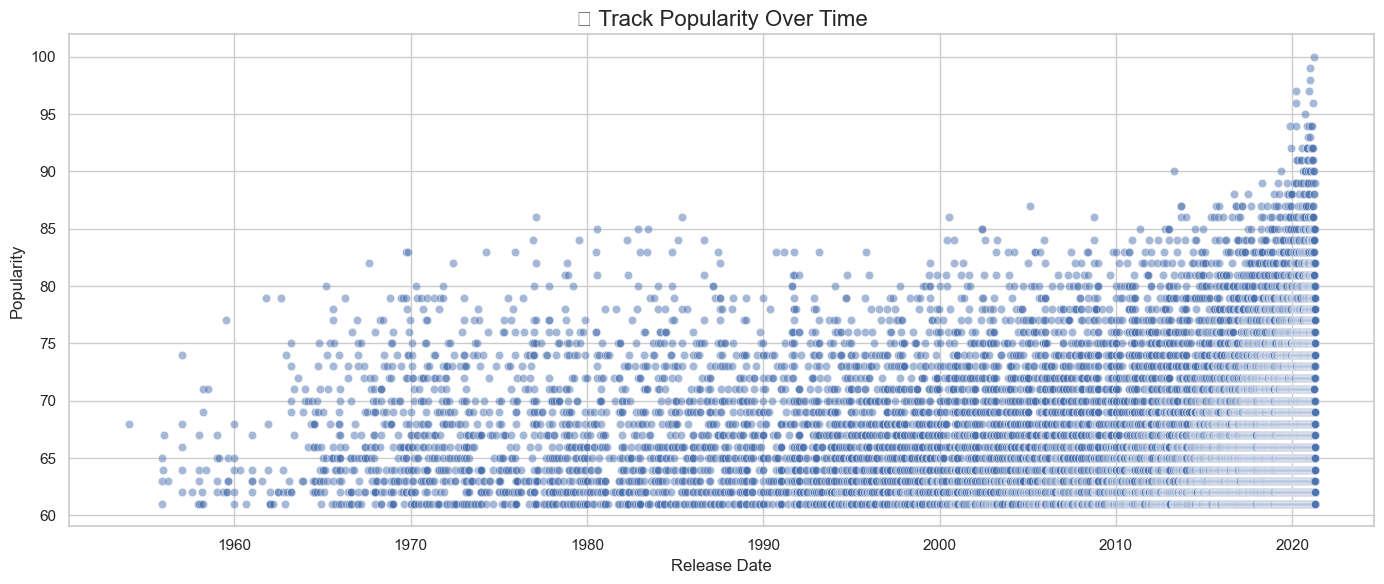

In [39]:
# Step 1: Make a copy of the main DataFrame
df_release = df_tracks[["name", "popularity", "release_date"]].dropna()

# Step 2: Convert release_date to datetime
df_release["release_date"] = pd.to_datetime(df_release["release_date"], errors='coerce')
df_release.dropna(subset=["release_date"], inplace=True)

# Step 3: Sort by date (optional)
df_release = df_release.sort_values("release_date")

# Step 4: Filter by popularity threshold (optional, to reduce clutter)
df_filtered = df_release[df_release["popularity"] > 60]

# Step 5: Plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_filtered, x="release_date", y="popularity", alpha=0.5)

plt.title("📆 Track Popularity Over Time", fontsize=16)
plt.xlabel("Release Date")
plt.ylabel("Popularity")
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2360867877.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["release_year"] = df_filtered["release_date"].dt.year
C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2360867877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year_range"] = pd.cut(df_filtered["release_year"], bins=bins, labels=labels, right=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2360867877.py:30: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) miss

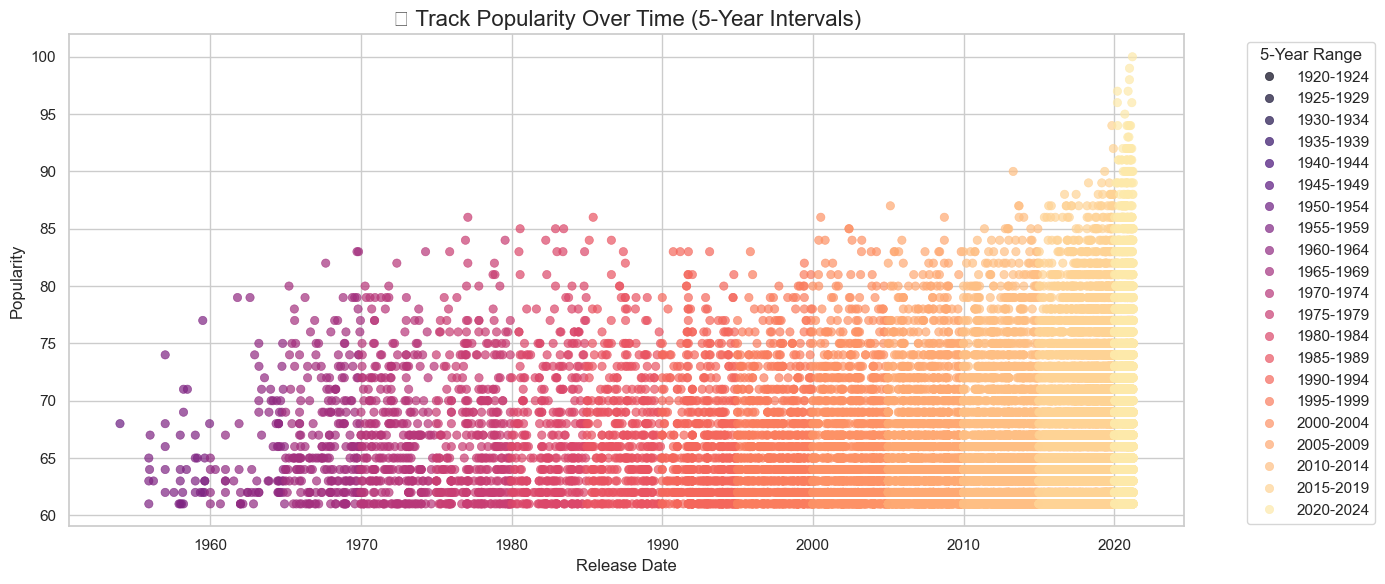

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Extract release year
df_filtered["release_year"] = df_filtered["release_date"].dt.year

# Step 2: Create 5-year bins
bins = list(range(1920, 2026, 5))  # Adjust end year as needed
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df_filtered["year_range"] = pd.cut(df_filtered["release_year"], bins=bins, labels=labels, right=False)

# Step 3: Plot with color by 5-year bin
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df_filtered,
    x="release_date",
    y="popularity",
    hue="year_range",          # Coloring by 5-year group
    palette="magma",         # You can change to 'coolwarm', 'magma', etc.
    alpha=0.7,
    edgecolor=None
)

plt.title("🎨 Track Popularity Over Time (5-Year Intervals)", fontsize=16)
plt.xlabel("Release Date")
plt.ylabel("Popularity")
plt.legend(title="5-Year Range", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Generate artist albums

In [195]:
import pandas as pd
df = pd.read_csv("spotify_dataset/tracks.csv")

def get_artist_albums(artist_name):
    # Filter songs by artist (case-insensitive match)
    artist_tracks = df[df["artists"].str.contains(artist_name, case=False, na=False)].copy()
    
    # Extract release year
    artist_tracks["release_year"] = pd.to_datetime(artist_tracks["release_date"], errors='coerce').dt.year

    # Create a pseudo-album identifier (track name + year)
    artist_tracks["pseudo_album"] = artist_tracks["name"] + " (" + artist_tracks["release_year"].astype(str) + ")"

    # Drop rows with NaN release year just in case
    artist_tracks.dropna(subset=["release_year"], inplace=True)

    # Get distinct pseudo-albums
    albums = artist_tracks[["pseudo_album", "release_year"]].drop_duplicates().sort_values(by="release_year")

    # Display
    print(f"📀 Albums by {artist_name} ({len(albums)} total):\n")
    for index, row in albums.iterrows():
        print(f"• {row['pseudo_album']} - {int(row['release_year'])}")

# 🔍 Example usage
get_artist_albums("taylor swift")

📀 Albums by taylor swift (193 total):

• Our Song (2006) - 2006
• Picture To Burn (2006) - 2006
• Should've Said No (2006) - 2006
• Mary's Song (Oh My My My) (2006) - 2006
• I'm Only Me When I'm With You (2006) - 2006
• A Place in this World (2006) - 2006
• Stay Beautiful (2006) - 2006
• Teardrops on My Guitar - Pop Version (2006) - 2006
• Tied Together with a Smile (2006) - 2006
• Invisible (2006) - 2006
• The Outside (2006) - 2006
• A Perfectly Good Heart (2006) - 2006
• Cold As You (2006) - 2006
• Tim McGraw (2006) - 2006
• Teardrops On My Guitar - Radio Single Remix (2006) - 2006
• Come In With The Rain (2008) - 2008
• Fearless (2008) - 2008
• Love Story (2008) - 2008
• The Way I Loved You (2008) - 2008
• You Belong With Me (2008) - 2008
• Last Christmas (2008) - 2008
• Forever & Always (2008) - 2008
• Breathe (2008) - 2008
• Hey Stephen (2008) - 2008
• The Other Side Of The Door (2008) - 2008
• Change (2008) - 2008
• Untouchable (2008) - 2008
• Forever & Always - Piano Version (20

In [189]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_artist_album_timeline(artist_name, max_albums=15):
    # 1. Filter for artist
    artist_tracks = df[df["artists"].str.contains(artist_name, case=False, na=False)].copy()

    # 2. Convert to datetime
    artist_tracks["release_date"] = pd.to_datetime(artist_tracks["release_date"], errors="coerce")

    # 3. Drop missing dates
    artist_tracks.dropna(subset=["release_date"], inplace=True)

    # 4. Create unique albums list
    unique_albums = artist_tracks[["name", "release_date"]].drop_duplicates()
    unique_albums = unique_albums.sort_values("release_date").tail(max_albums)

    # 5. Shorten long album names
    unique_albums["short_name"] = unique_albums["name"].apply(
        lambda x: x if len(x) <= 30 else x[:27] + "..."
    )

    # 6. Plot
    fig, ax = plt.subplots(figsize=(12, 0.5 * max_albums))
    ax.scatter(unique_albums["release_date"], range(len(unique_albums)), color="darkblue")

    ax.set_yticks(range(len(unique_albums)))
    ax.set_yticklabels(unique_albums["short_name"])
    ax.set_xlabel("Release Date")
    ax.set_title(f"Timeline of Last {max_albums} Unique Albums by {artist_name}")

    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()


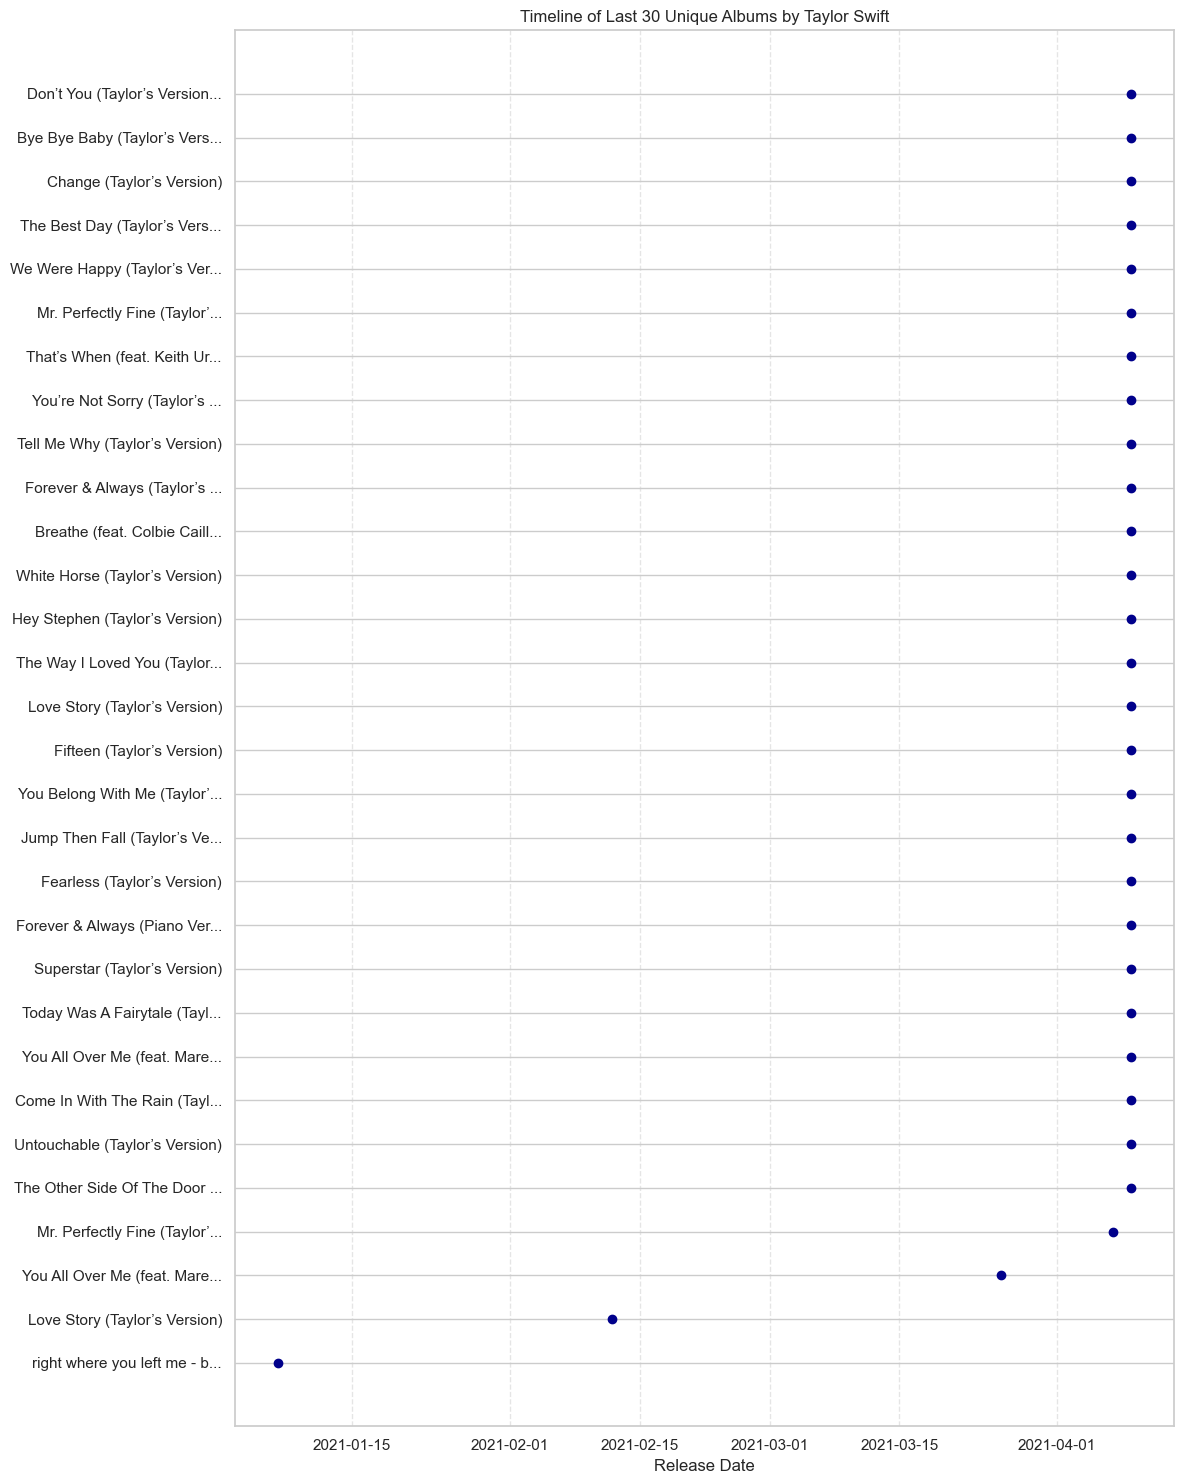

In [197]:
plot_artist_album_timeline("Taylor Swift", max_albums=30)


In [81]:
df.columns


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

## Top Popular Genres in general 

In [83]:
import pandas as pd

genre_df = pd.read_csv(r"spotify_dataset\features.csv")
genre_df.columns



Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [85]:
genre_df[['track_id', 'artist_name', 'genre']].head()


track_id        artist_name  genre
0  0BRjO6ga9RKCKjfDqeFgWV     Henri Salvador  Movie
1  0BjC1NfoEOOusryehmNudP  Martin & les fées  Movie
2  0CoSDzoNIKCRs124s9uTVy    Joseph Williams  Movie
3  0Gc6TVm52BwZD07Ki6tIvf     Henri Salvador  Movie
4  0IuslXpMROHdEPvSl1fTQK       Fabien Nataf  Movie

In [91]:
# If you want to check safely
print(type(artists_df['genres'][0]))  # Should be <class 'list'>


<class 'list'>


In [89]:

genre_df.rename(columns={'track_id': 'id'}, inplace=True)

df_with_genre = df.merge(genre_df[['id', 'genre']], on='id', how='left')

print(df_with_genre[['id', 'name', 'genre']].head(10))


                       id                                 name genre
0  35iwgR4jXetI318WEWsa1Q                                Carve   NaN
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   NaN
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   NaN
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   NaN
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   NaN
5  0BRXJHRNGQ3W4v9frnSfhu                            Ave Maria   NaN
6  0Dd9ImXtAtGwsmsAD69KZT                       La Butte Rouge   NaN
7  0IA0Hju8CAgYfV1hwhidBH                              La Java   NaN
8  0IgI1UCz84pYeVetnl1lGP                   Old Fashioned Girl   NaN
9  0JV4iqw2lSKJaHBQZ0e5zK        Martín Fierro - Remasterizado   NaN


In [93]:
# Grouping by genre and calculating average popularity
genre_popularity = df_with_genre.groupby('genre')['popularity'].mean().reset_index()

# Sorting by popularity
genre_popularity_sorted = genre_popularity.sort_values(by='popularity', ascending=False)

# Top 10 most popular genres
top_10_genres = genre_popularity_sorted.head(10)

# Display
print(top_10_genres)


               genre  popularity
16               Pop   67.720859
18               Rap   64.784620
11           Hip-Hop   62.750438
8              Dance   62.718119
21              Rock   62.284521
12             Indie   61.518700
4   Children’s Music   60.271010
17               R&B   59.835526
0        Alternative   59.339369
10              Folk   55.267785


C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2087145989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_genres, x='popularity', y='genre', palette='coolwarm')
C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2087145989.py:9: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


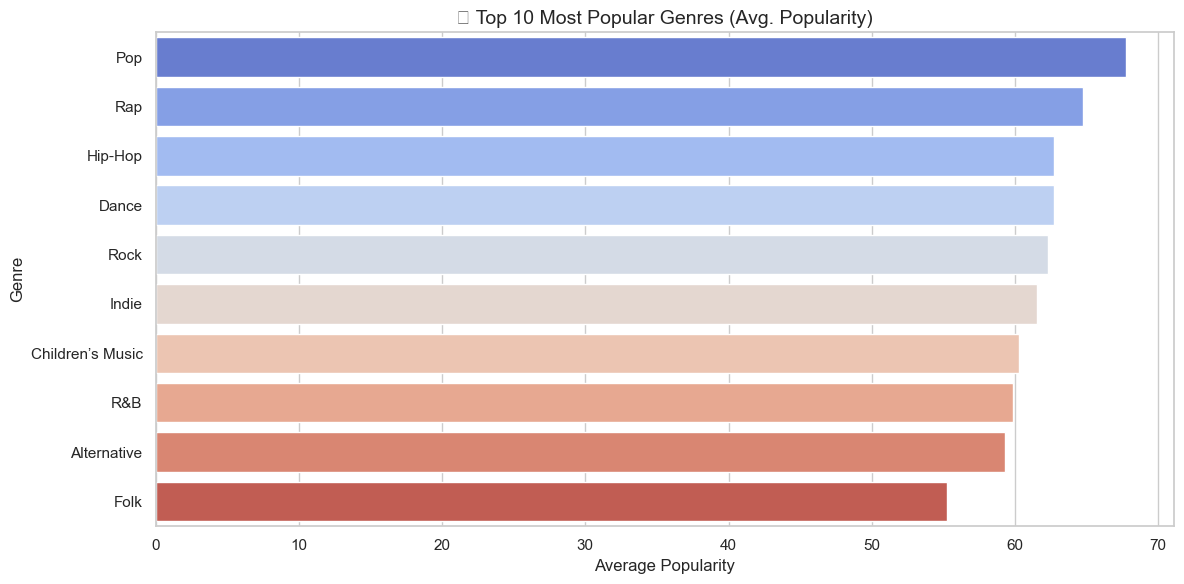

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genres, x='popularity', y='genre', palette='coolwarm')
plt.title('🎵 Top 10 Most Popular Genres (Avg. Popularity)', fontsize=14)
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


## Audio Feature by Genre

In [97]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness']
# Select top 5 genres
top_genres = top_10_genres['genre'].head(5).tolist()

# Filter data for those genres
filtered_df = df_with_genre[df_with_genre['genre'].isin(top_genres)]

# Group by genre and calculate mean for selected features
genre_features = filtered_df.groupby('genre')[features].mean()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\608234216.py:26: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


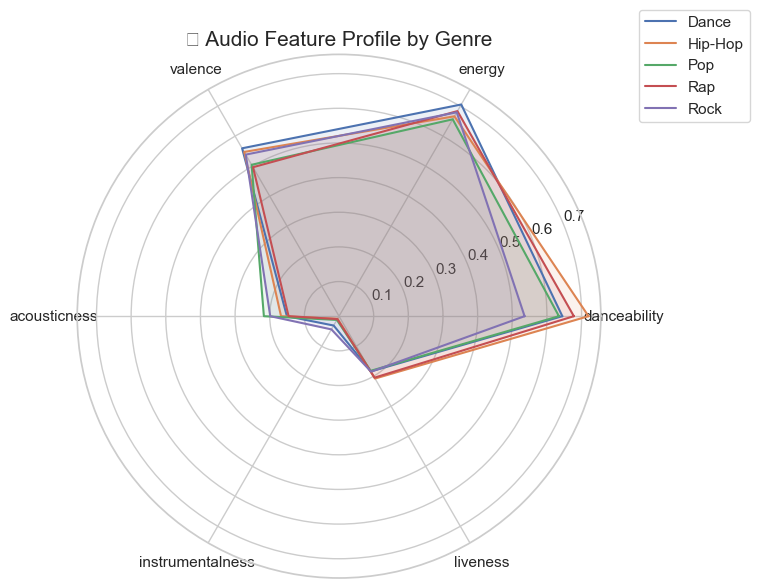

In [99]:
import numpy as np

# Radar chart setup
labels = features
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Init plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each genre
for genre in genre_features.index:
    values = genre_features.loc[genre].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=genre)
    ax.fill(angles, values, alpha=0.1)

# Labels and styling
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("🎧 Audio Feature Profile by Genre", size=15)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


## Average Track Popularity over years


C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\751352450.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


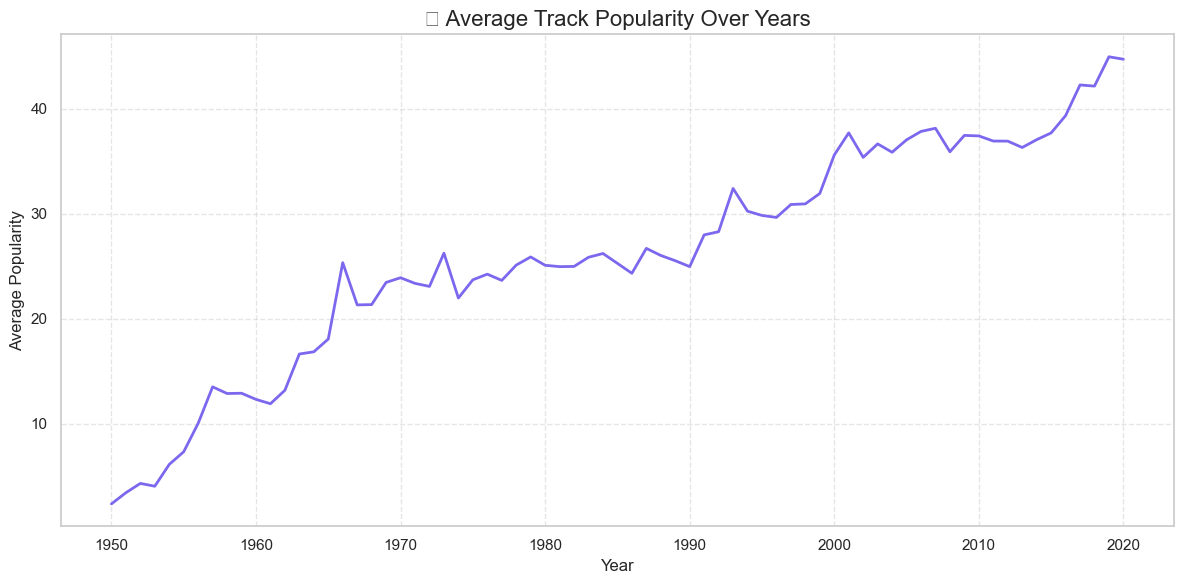

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (if not already)
tracks = pd.read_csv(r'spotify_dataset/tracks.csv')

# Convert release_date to datetime
tracks['release_date'] = pd.to_datetime(tracks['release_date'], errors='coerce')

# Drop rows with invalid dates
tracks = tracks.dropna(subset=['release_date'])

# Extract year from release_date
tracks['year'] = tracks['release_date'].dt.year

# Filter out weird years (Spotify has some 1800s garbage)
tracks = tracks[(tracks['year'] >= 1950) & (tracks['year'] <= 2020)]

# Group by year and calculate mean popularity
yearly_popularity = tracks.groupby('year')['popularity'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_popularity['year'], yearly_popularity['popularity'], color='mediumslateblue', linewidth=2)
plt.title("📈 Average Track Popularity Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Audio Feature By genre

In [105]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"spotify_dataset/features.csv")

# Drop rows with missing genres (optional but clean)
df = df.dropna(subset=['genre'])

# Select only numerical audio features
audio_features = ['acousticness', 'danceability', 'duration_ms', 'energy',
                  'instrumentalness', 'key', 'liveness', 'loudness',
                  'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
# Convert audio features to numeric, forcing errors to NaN
df[audio_features] = df[audio_features].apply(pd.to_numeric, errors='coerce')

# Group by genre and compute mean of each feature
genre_features = df.groupby('genre')[audio_features].mean().round(3)

genre_features.head()


acousticness  danceability  duration_ms  energy  \
genre                                                               
A Capella                0.830         0.412   204467.697   0.250   
Alternative              0.162         0.542   233241.364   0.712   
Anime                    0.287         0.472   229937.068   0.665   
Blues                    0.328         0.528   251931.826   0.606   
Children's Music         0.592         0.697   142726.774   0.397   

                  instrumentalness  key  liveness  loudness  mode  \
genre                                                               
A Capella                    0.007  NaN     0.137   -13.660   NaN   
Alternative                  0.061  NaN     0.197    -6.541   NaN   
Anime                        0.281  NaN     0.192    -7.918   NaN   
Blues                        0.095  NaN     0.233    -9.054   NaN   
Children's Music             0.144  NaN     0.165   -11.642   NaN   

                  speechiness    tempo  time_signature  valence  
genre                                                            
A Capella               0.042  111.519             NaN    0.329  
Alternative             0.089  122.534             NaN    0.450  
Anime                   0.065  126.629             NaN    0.442  
Blues                   0.062  121.138             NaN    0.579  
Children's Music        0.117  121.131             NaN    0.676

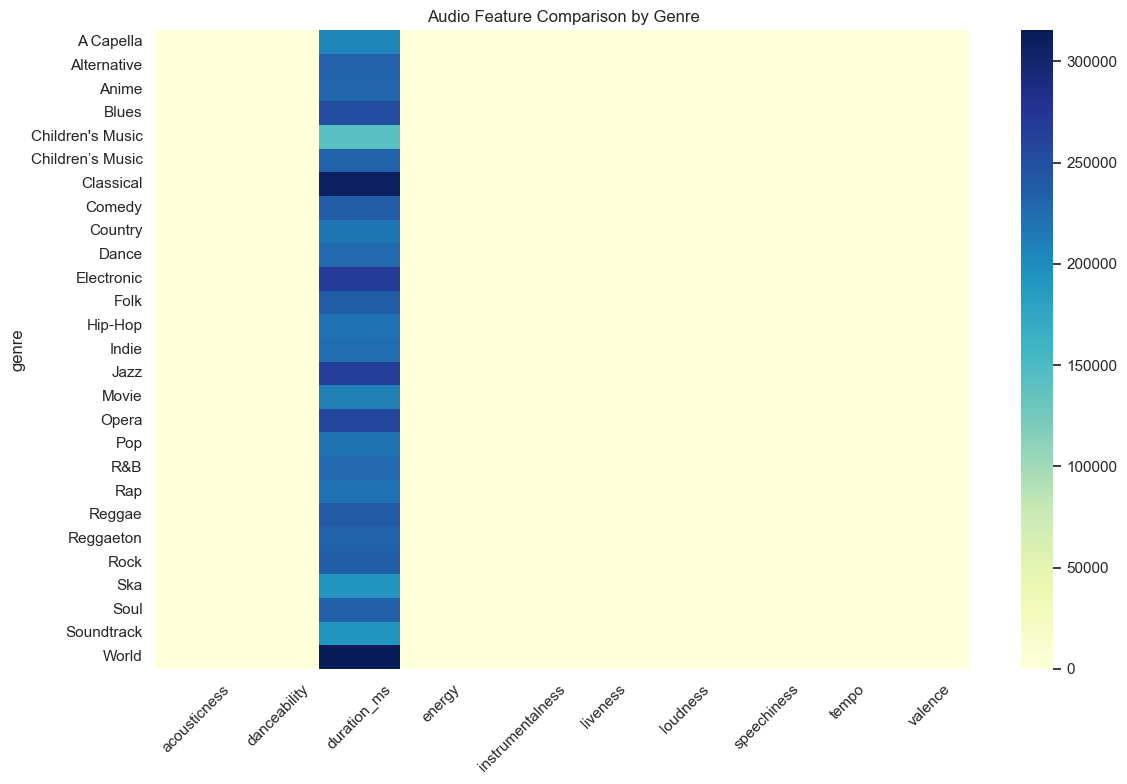

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute genre-level means
genre_mean = df.groupby('genre')[audio_features].mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_mean, cmap='YlGnBu', annot=False)
plt.title('Audio Feature Comparison by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


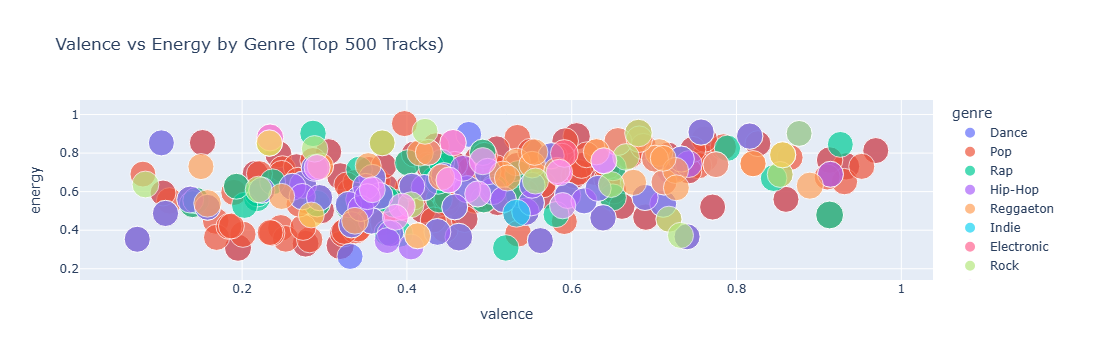

In [109]:
top_500 = df.sort_values(by="popularity", ascending=False).head(500)

fig = px.scatter(top_500,
                 x="valence",
                 y="energy",
                 color="genre",
                 size="popularity",
                 hover_name="track_name",
                 title="Valence vs Energy by Genre (Top 500 Tracks)")
fig.show()


In [111]:
print(df.columns.tolist())


['genre', 'artist_name', 'track_name', 'track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\4143059696.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



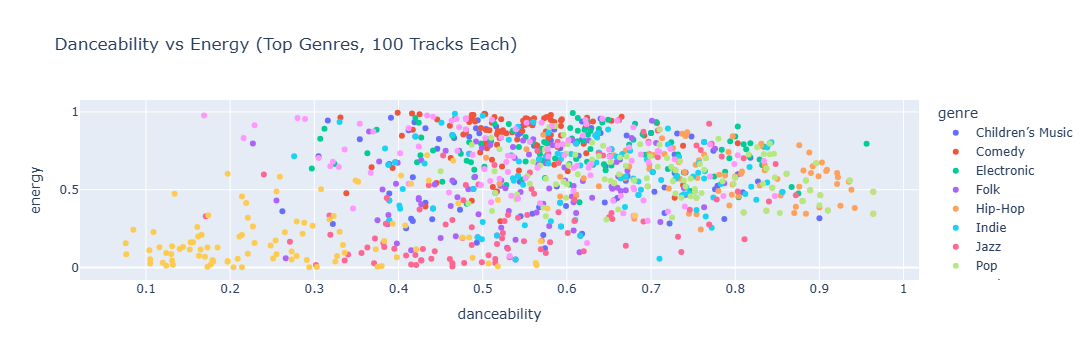

In [115]:
top_genres = df['genre'].value_counts().nlargest(10).index
filtered_df = df[df['genre'].isin(top_genres)]

# Optional: reduce rows per genre to avoid crowding
filtered_df = filtered_df.groupby('genre').apply(lambda x: x.head(100)).reset_index(drop=True)

fig = px.scatter(filtered_df,
                 x='danceability',
                 y='energy',
                 color='genre',
                 hover_name='track_name',
                 title='Danceability vs Energy (Top Genres, 100 Tracks Each)')
fig.show()


## ML Prediction and Training

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and target selection
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'speechiness', 'tempo', 'valence']
X = df[features]
y = df['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# More evaluation metrics
lin_mae = mean_absolute_error(y_test, y_pred)
lin_rmse = np.sqrt(mse)  # You already calculated mse earlier
lin_r2 = r2  # You already have this too

print(f"Mean Absolute Error: {lin_mae:.2f}")
print(f"Root Mean Squared Error: {lin_rmse:.2f}")

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 12.88
Root Mean Squared Error: 16.12
Mean Squared Error: 259.81
R^2 Score: 0.22


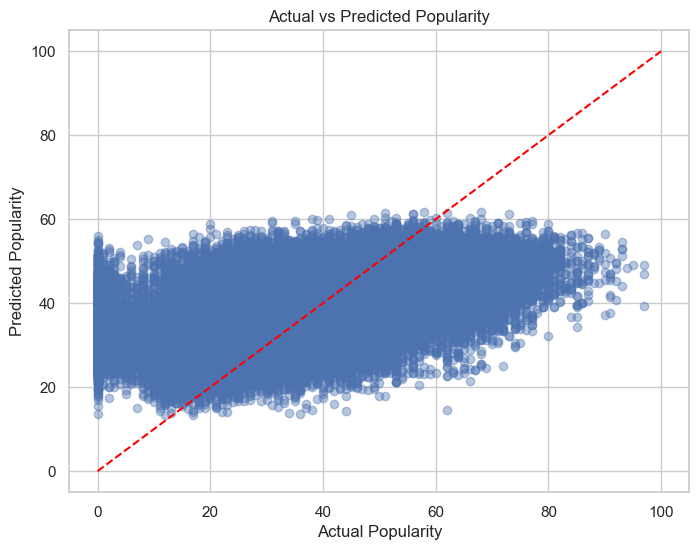

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.grid(True)
plt.show()


In [128]:
#from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(n_estimators=100, max_depth=30, n_jobs=-1, random_state=42)
#rf.fit(X_train, y_train)
import joblib
rf = joblib.load("random_forest_model.pkl")


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_rf = rf.predict(X_test_scaled)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")


Random Forest MAE: 17.06
Random Forest RMSE: 20.73
Random Forest R²: -0.29


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



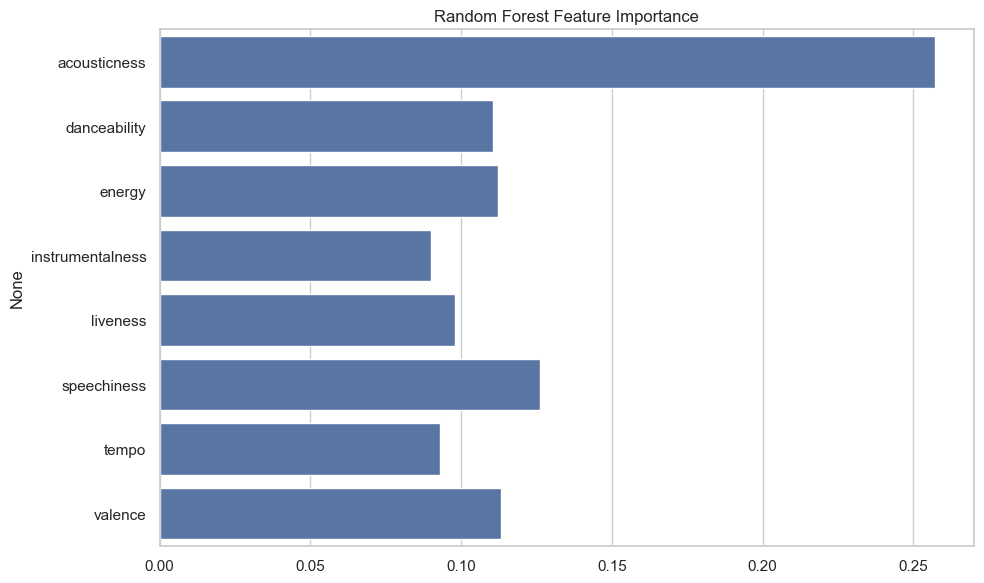

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(rf.feature_importances_, index=features)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


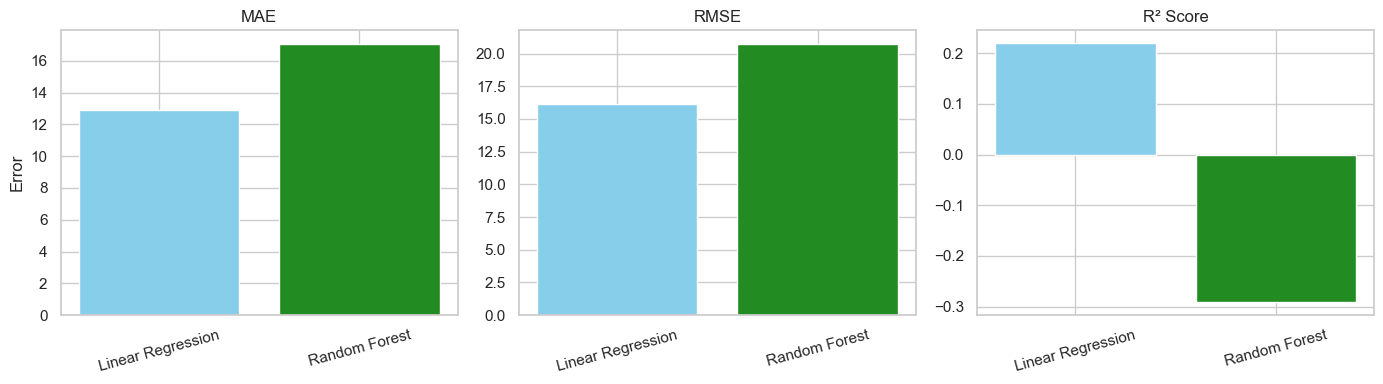

In [134]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest']
mae_scores = [lin_mae, rf_mae]
rmse_scores = [lin_rmse, rf_rmse]
r2_scores = [lin_r2, rf_r2]

x = range(len(models))

plt.figure(figsize=(14, 4))

# MAE
plt.subplot(1, 3, 1)
plt.bar(x, mae_scores, color=['skyblue', 'forestgreen'])
plt.xticks(x, models, rotation=15)
plt.title('MAE')
plt.ylabel('Error')

# RMSE
plt.subplot(1, 3, 2)
plt.bar(x, rmse_scores, color=['skyblue', 'forestgreen'])
plt.xticks(x, models, rotation=15)
plt.title('RMSE')

# R²
plt.subplot(1, 3, 3)
plt.bar(x, r2_scores, color=['skyblue', 'forestgreen'])
plt.xticks(x, models, rotation=15)
plt.title('R² Score')

plt.tight_layout()
plt.show()


In [136]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [150]:
model = joblib.load('random_forest_model.pkl')


## Track popularity by country

In [203]:
df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [138]:
# Export top 100 popular tracks
top_tracks = df.sort_values(by="popularity", ascending=False).head(100)
top_tracks.to_csv("top_100_tracks.csv", index=False)
print("Top 100 popular tracks exported to 'top_100_tracks.csv'")


Top 100 popular tracks exported to 'top_100_tracks.csv'


In [140]:
import random

# Simulate a list of countries
countries = ['USA', 'India', 'UK', 'Canada', 'Germany']

# Assign each track a random country
df['country'] = [random.choice(countries) for _ in range(len(df))]

# Top 5 tracks by popularity for each country
leaderboards = df.groupby('country').apply(lambda x: x.nlargest(5, 'popularity'))[['country', 'track_name', 'artist_name', 'popularity']]
print(leaderboards)


                country                                      track_name  \
country                                                                   
Canada  86951    Canada                                            Wow.   
        107803   Canada                                            Wow.   
        66643    Canada                                       Con Calma   
        107909   Canada                                       Con Calma   
        9037     Canada                                Sweet but Psycho   
Germany 9026    Germany        break up with your girlfriend, i'm bored   
        107808  Germany                                      Without Me   
        107830  Germany                                         Shallow   
        9031    Germany                                   thank u, next   
        9040    Germany                                         Shallow   
India   107804    India                                         7 rings   
        107802    India  

C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2070875508.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## Recommendation Engine

In [142]:
from sklearn.metrics.pairwise import cosine_similarity

# Features for similarity
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness']

# Scale only the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


In [144]:
import numpy as np

def recommend_tracks(track_name, n=5):
    # Find index of the track
    track_idx = df[df['track_name'].str.lower() == track_name.lower()].index
    if track_idx.empty:
        return f"Track '{track_name}' not found in the dataset."

    track_vector = scaled_features[track_idx[0]].reshape(1, -1)
    similarities = cosine_similarity(track_vector, scaled_features).flatten()
    
    # Get top n similar tracks (excluding the track itself)
    similar_indices = similarities.argsort()[::-1][1:n+1]
    return df.iloc[similar_indices][['track_name', 'artist_name', 'popularity']]


In [146]:
recommend_tracks("Shape of You")


track_name   artist_name  \
188233                               What Does She Know?  Mustard Plug   
21749                                         Mala Gente        Juanes   
50000                      She's Waiting - 1999 Remaster  Eric Clapton   
65293                                       Tanz mit mir          Faun   
160210  Lo Que Dejaste Al No Volver (feat. Carlos Baute)   Lucas Arnau   

        popularity  
188233          21  
21749           54  
50000           31  
65293           56  
160210          49

In [148]:
recommend_tracks("Love me like you do")  # You can change this to any track name from your dataset


track_name     artist_name  popularity
59879        Love Me Like You Do  Ellie Goulding          63
218532            Christmas Time    Phil Wickham          28
4309    All Tractors Ain't Green    Jimmie Allen          39
13542        I Will Fear No More      The Afters          40
208903              Fear No More      The Afters          40

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify_dataset/tracks.csv")

# Remove square brackets and quotes from the 'artists' column
df['artists'] = df['artists'].astype(str).str.replace(r"[\[\]']", "", regex=True)

# Optional: remove excess whitespace
df['artists'] = df['artists'].str.strip().str.replace(r"\s*,\s*", ", ", regex=True)

# Save the cleaned dataset back (overwrite or new file)
df.to_csv("spotify_dataset/tracks.csv", index=False)
